In [1]:
import cv2
import os

from matplotlib import pyplot as plt
%config Completer.use_jedi = False
import json
import numpy as np
from matplotlib.pyplot import figure
from utils import get_iou, extract_acc_params , metric , compare_iou_and_matric
# Create 500 x 500 Empty canvas of white color


In [2]:
imgs_path = "/workspace/greeneye_test/data/img/"
gt_path = "/workspace/greeneye_test/data/ground_truth/"
pred_path = "/workspace/greeneye_test/data/prediction/"

files = os.listdir(imgs_path)

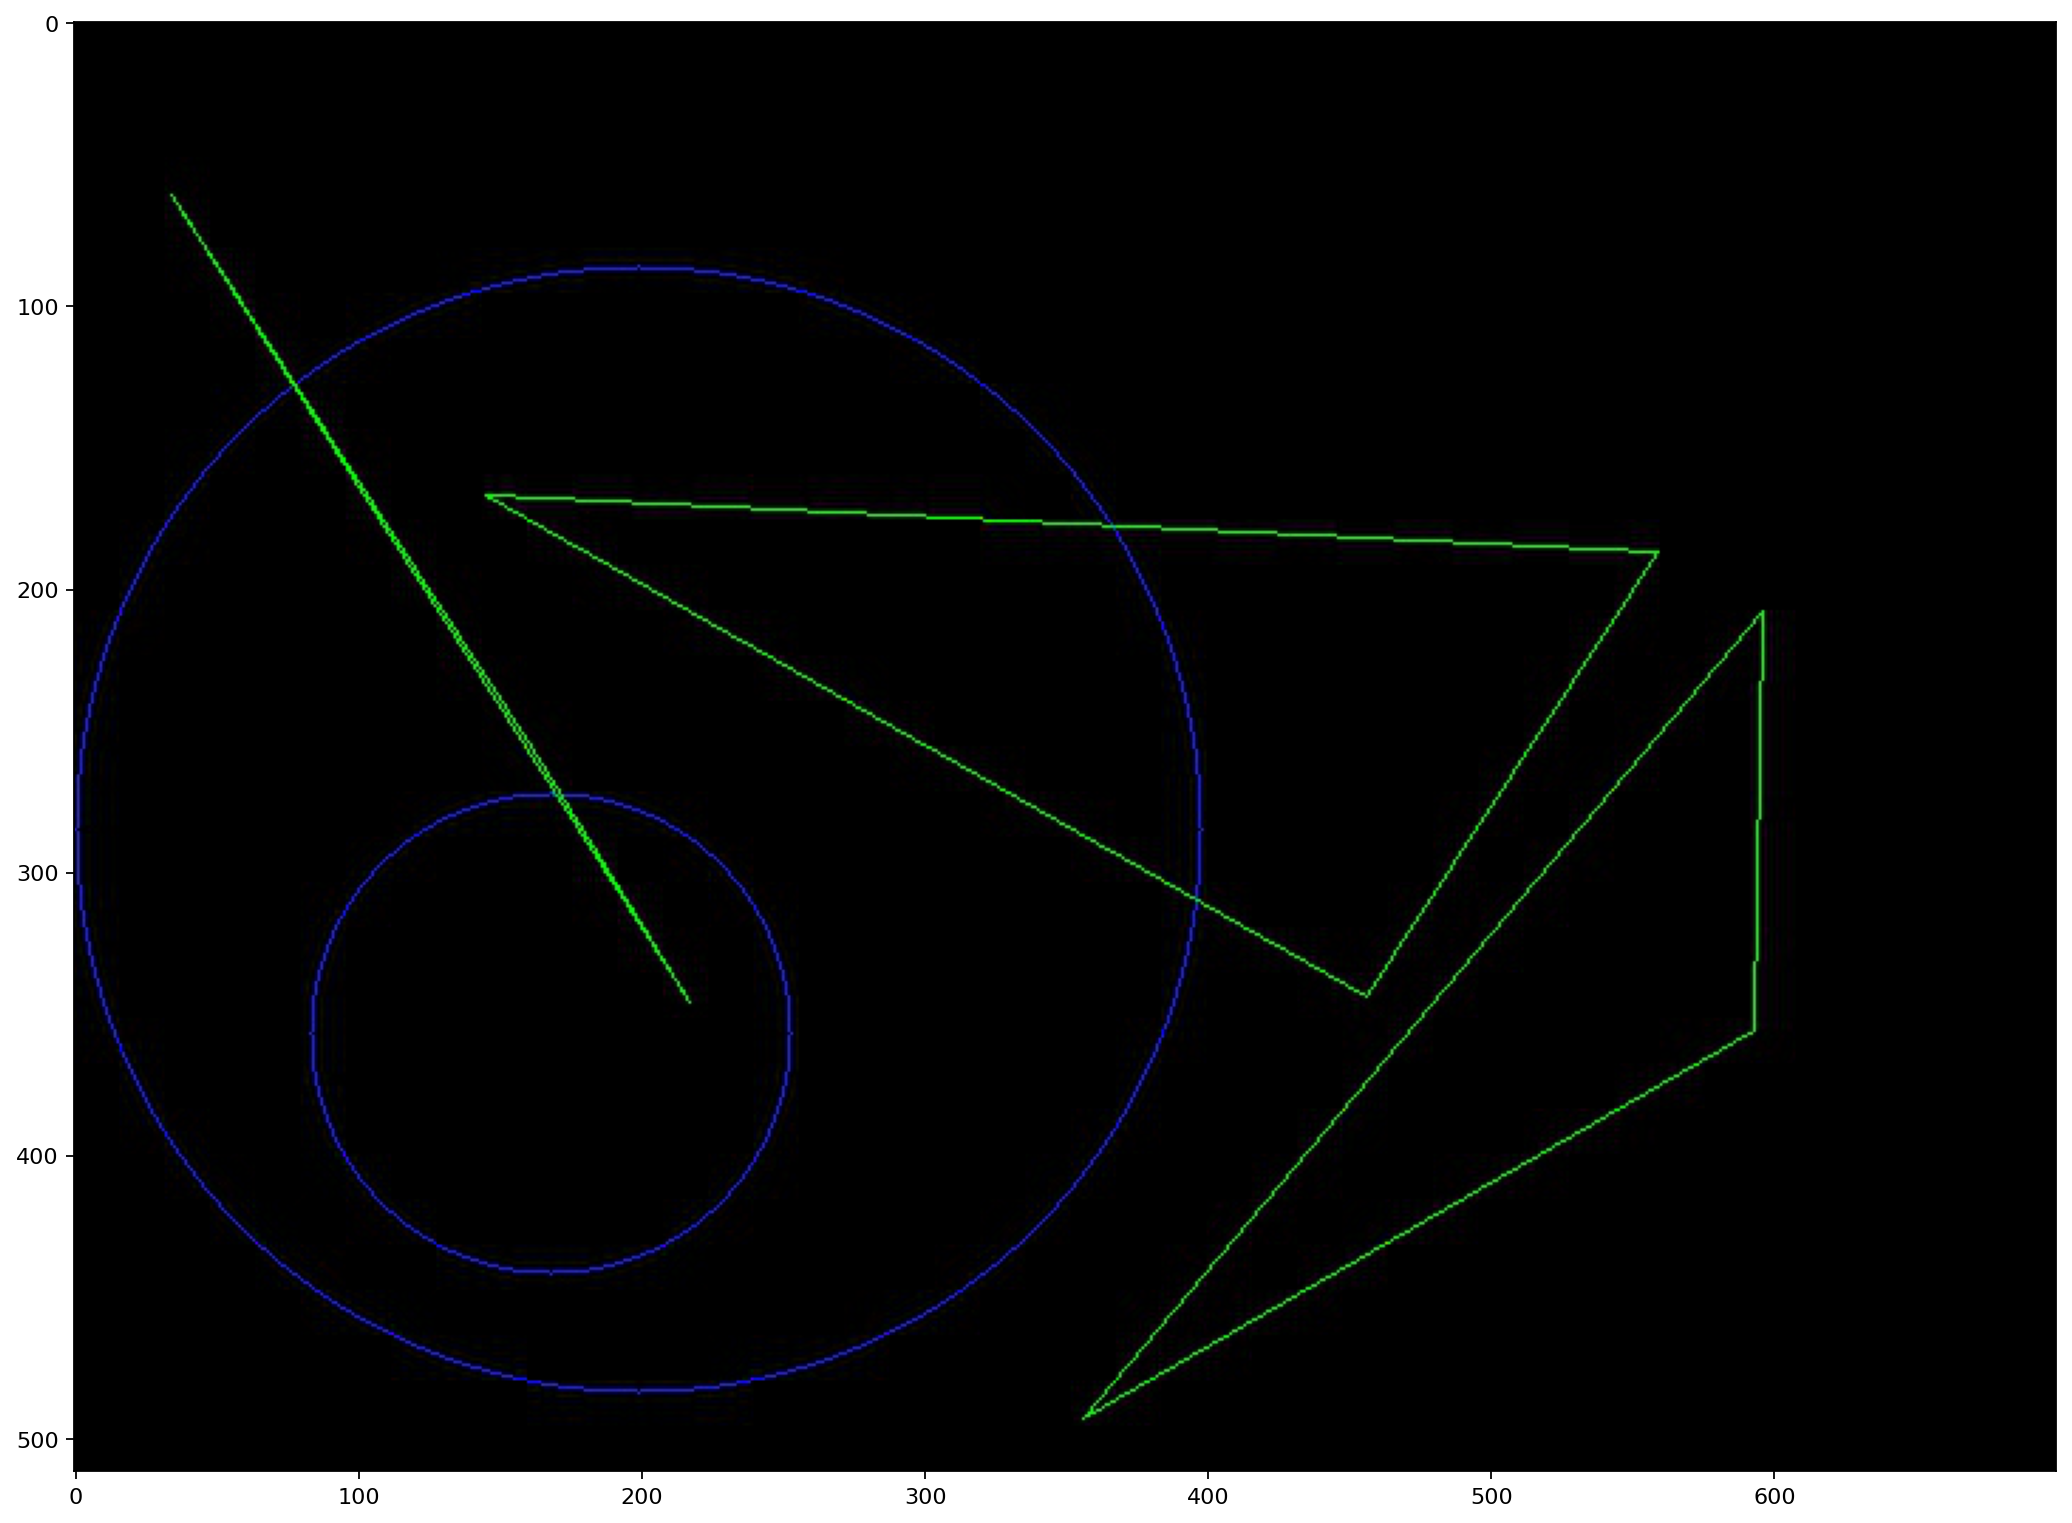

In [3]:
i = 1
name = files[i][:-4]
img = cv2.imread(os.path.join(imgs_path,name+".jpg"))
figure(figsize=(16, 12), dpi=160)
plt.imshow(img)

In [4]:
with open(os.path.join(gt_path,name+".json"), 'r') as myjson:
    file_read=myjson.read()
json_object = json.loads(file_read)

for key in json_object.keys():
    shape = json_object[key]
    for one_gt in shape:
        start_point = tuple(one_gt[0])
        end_point = tuple(one_gt[1])
        color = (255, 0, 0)
        thickness = 1
        img = cv2.rectangle(img, start_point, end_point, color, thickness)

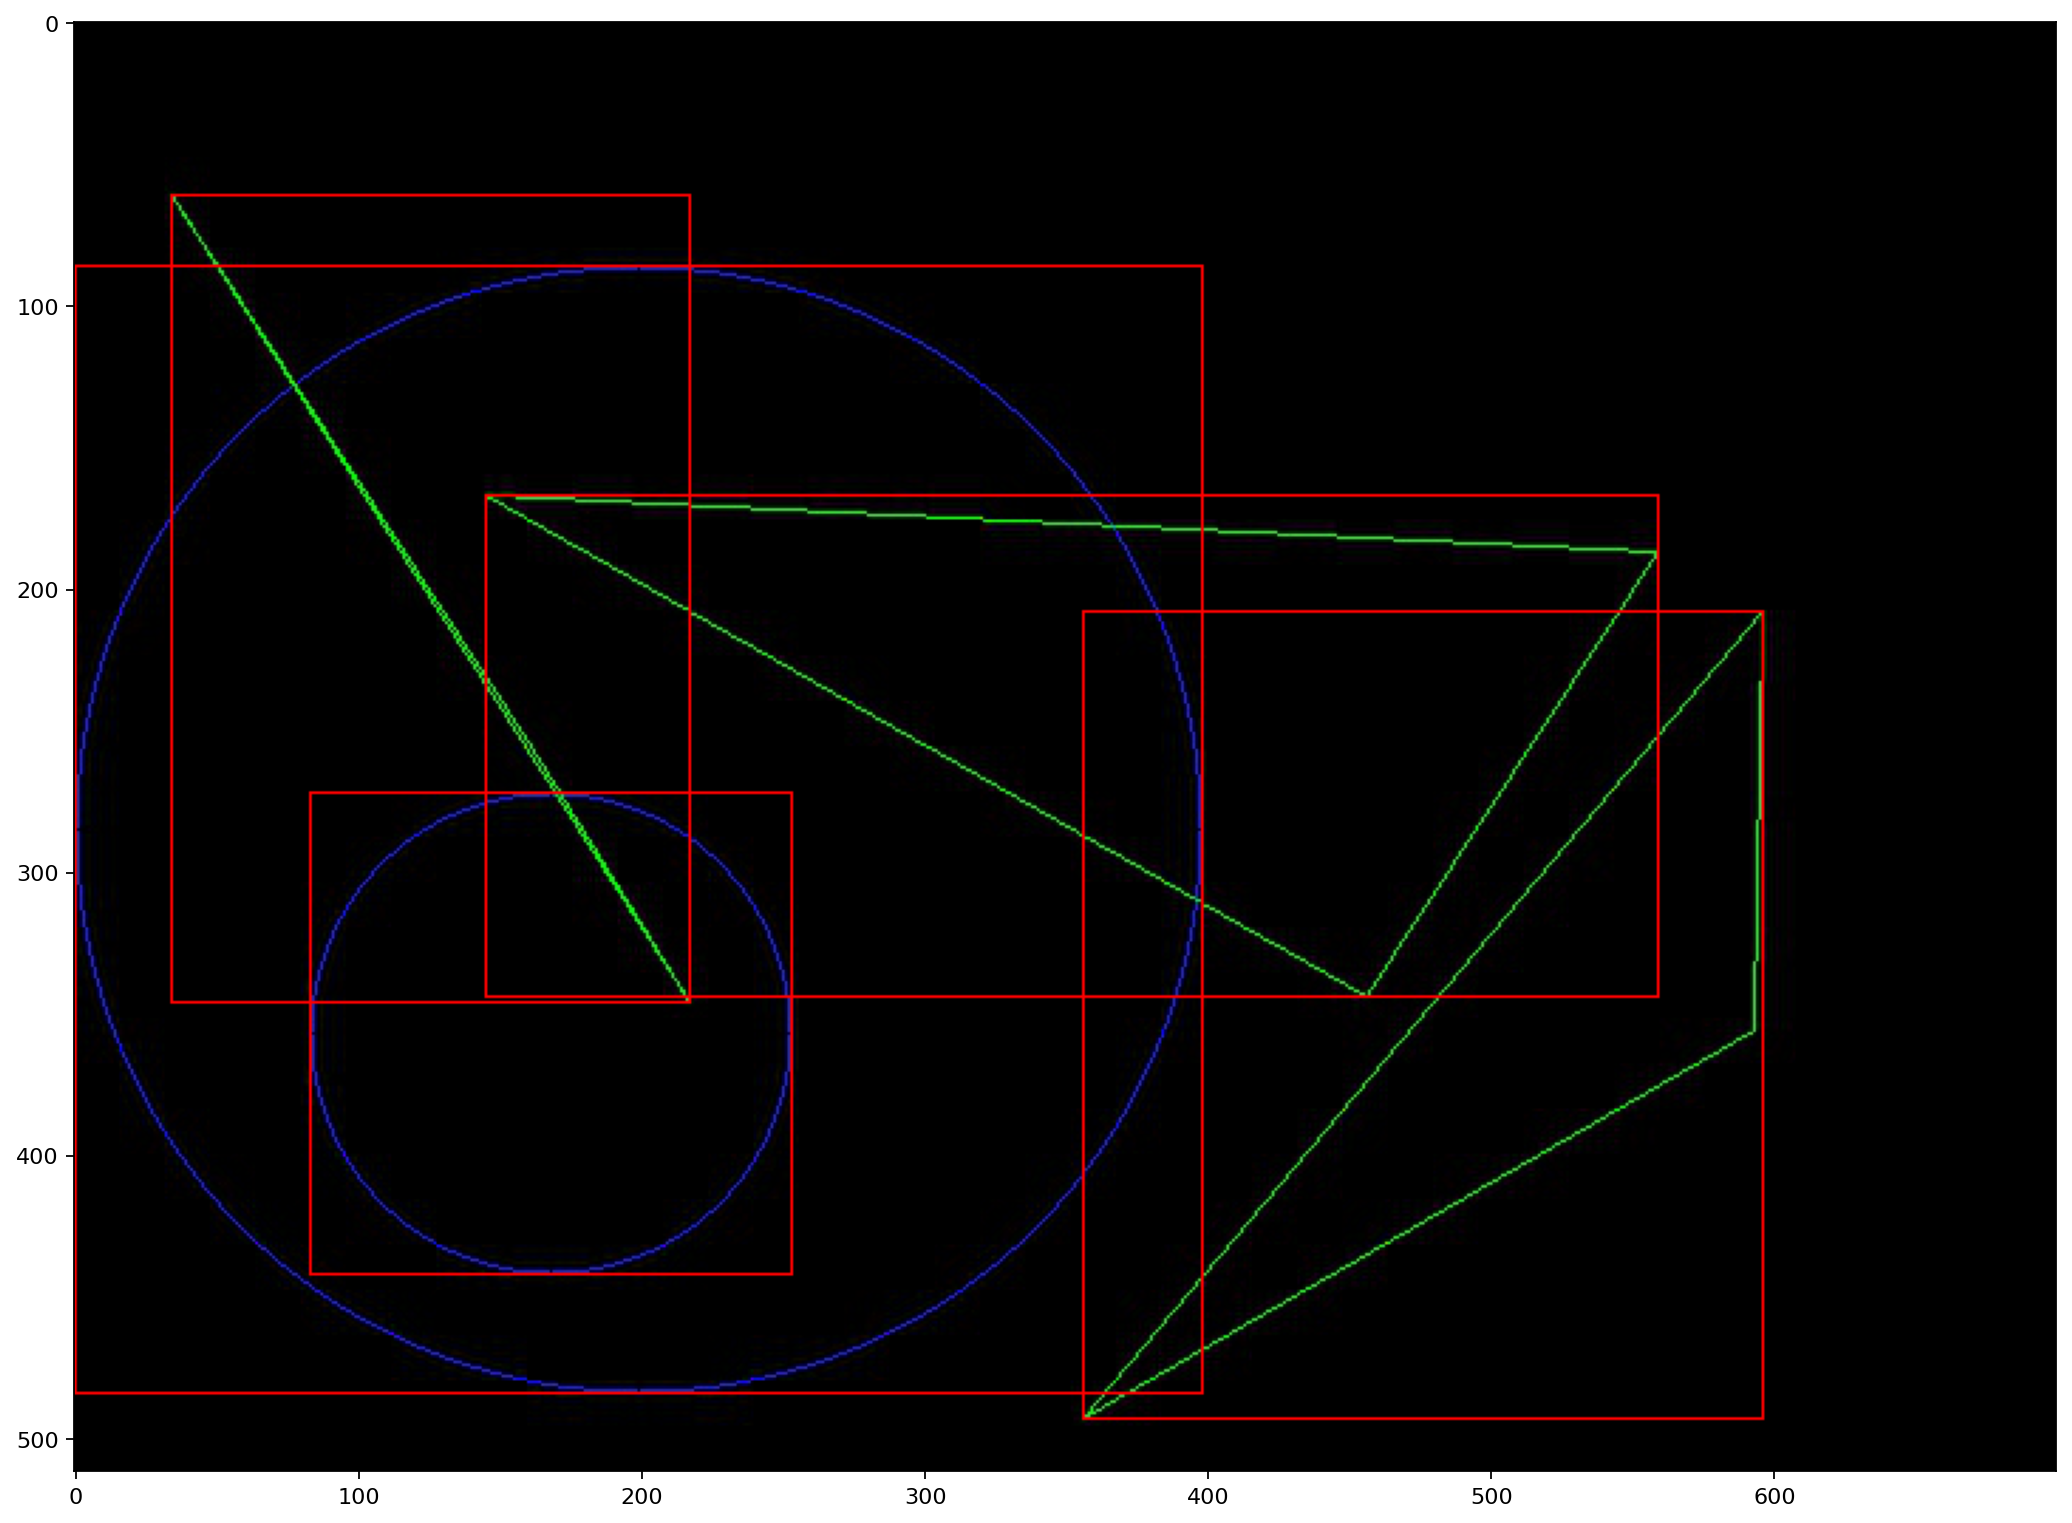

In [5]:
figure(figsize=(16, 12), dpi=160)
plt.imshow(img)

In [6]:
with open(os.path.join(pred_path,name+".json"), 'r') as myjson:
    file_read=myjson.read()
json_object = json.loads(file_read)

for key in json_object.keys():
    shape = json_object[key]
    for one_gt in shape:
        start_point = tuple(one_gt[0])
        end_point = tuple(one_gt[1])
        color = (0, 255, 255)
        thickness = 1
        img = cv2.rectangle(img, start_point, end_point, color, thickness)

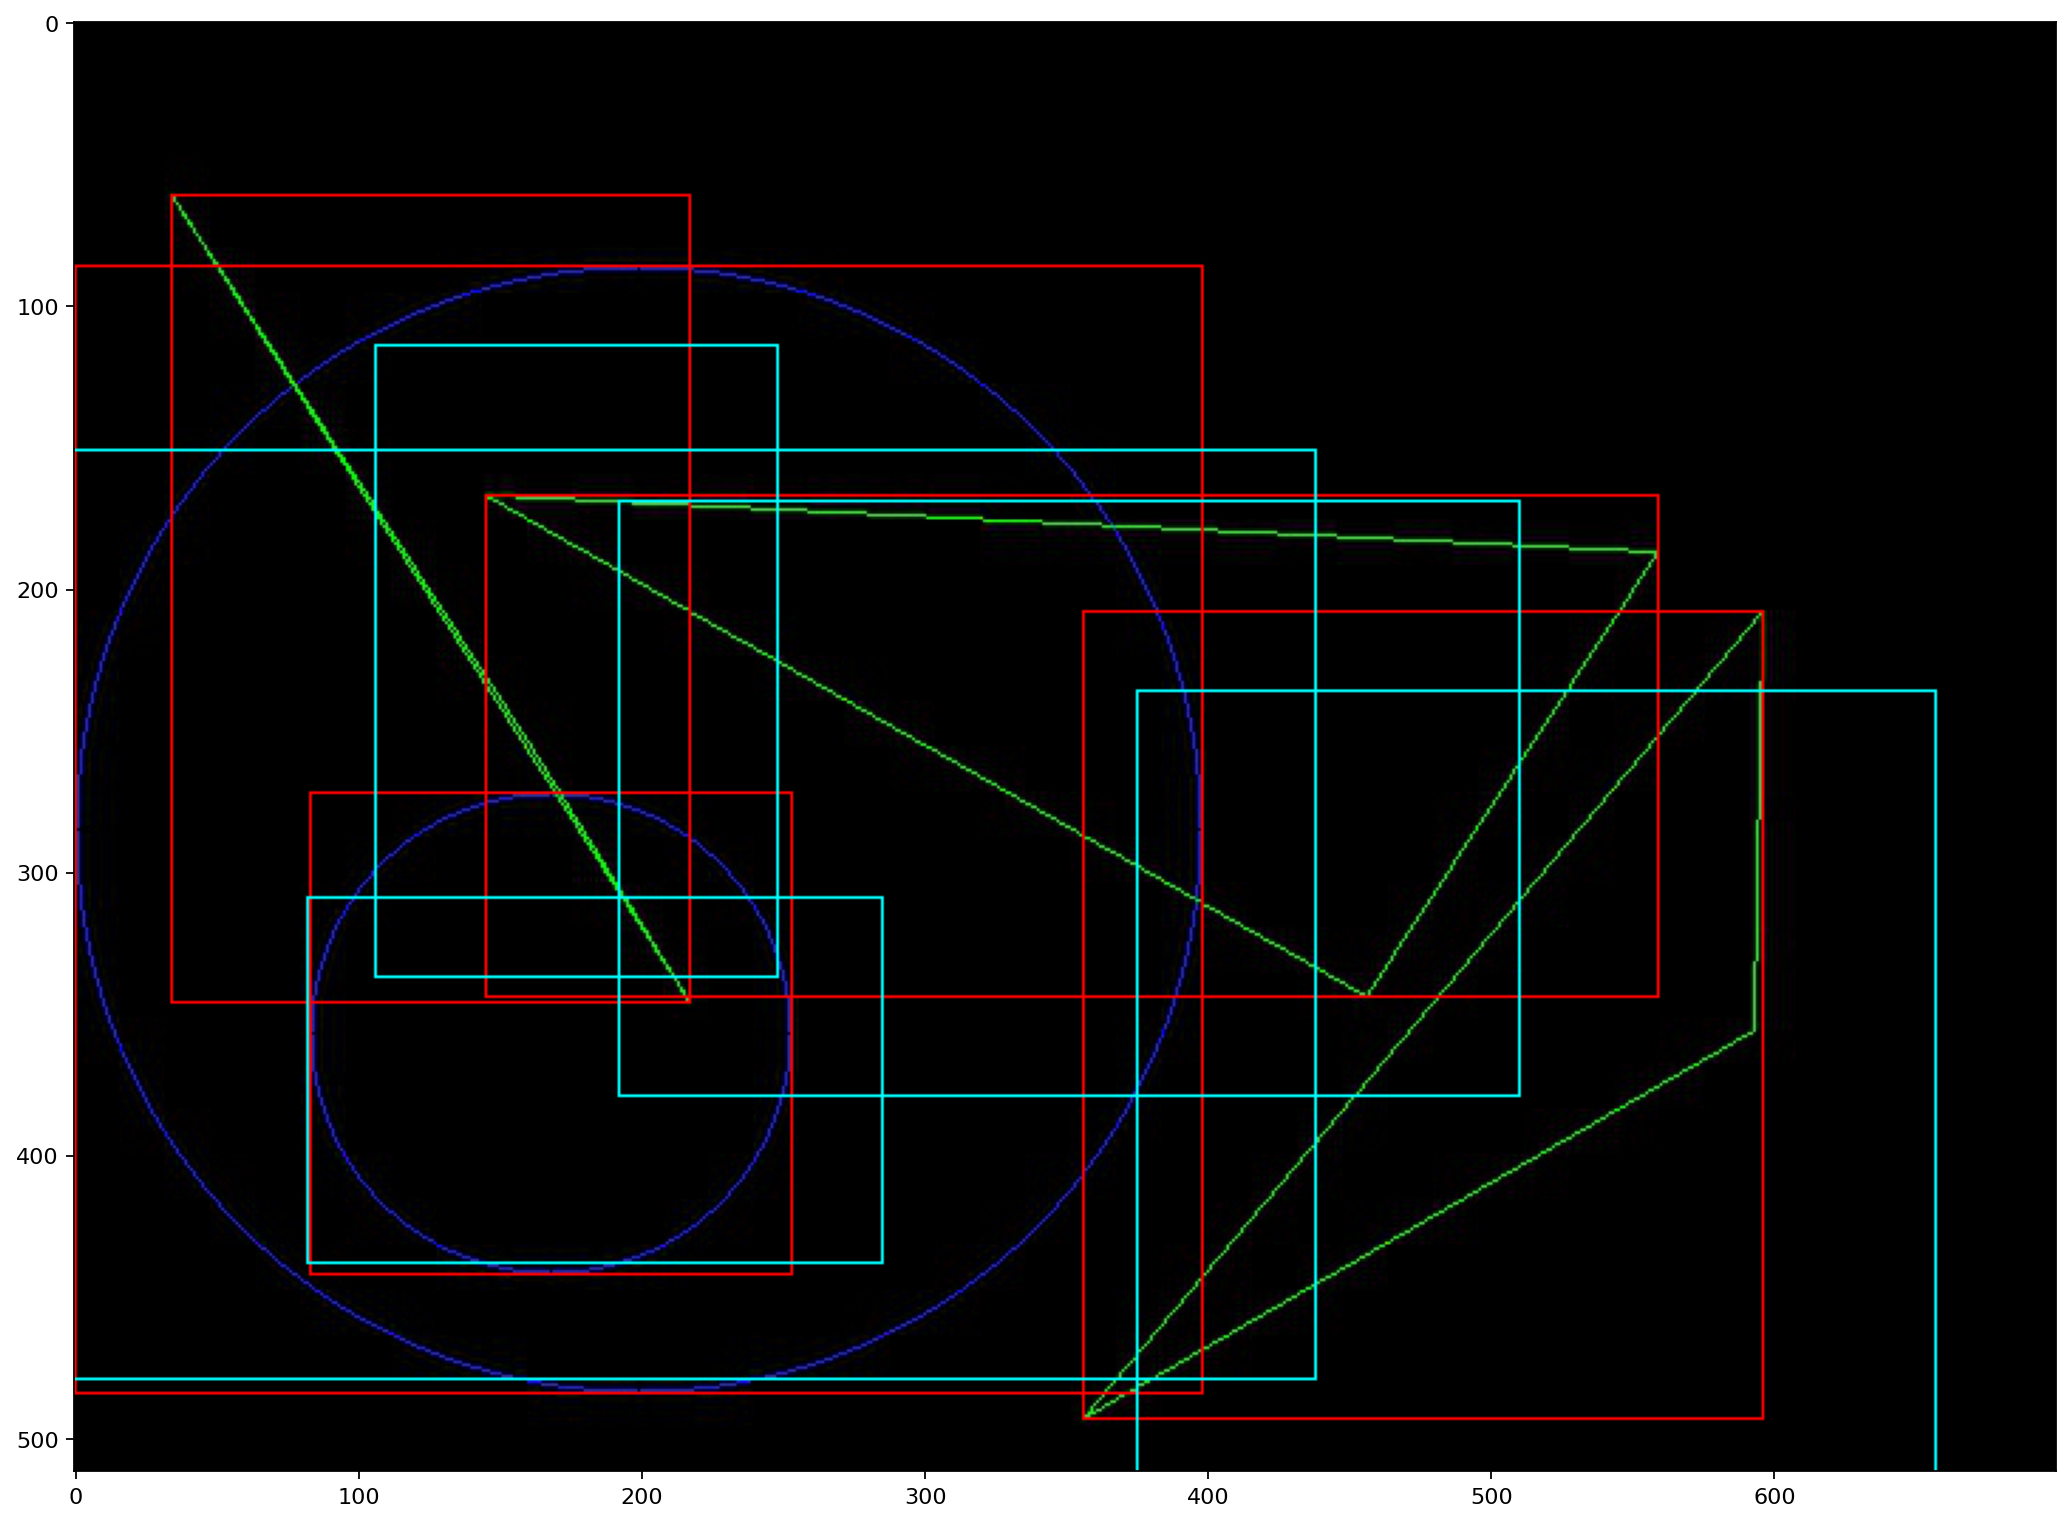

In [7]:
figure(figsize=(16, 12), dpi=160)
plt.imshow(img)

In [8]:

file_gt = os.path.join(gt_path,name+".json")
file_pred = os.path.join(pred_path,name+".json")
results = extract_acc_params(file_gt,file_pred)

In [9]:
for key in results.keys():
    if results[key]["poitives"]:
        precision = results[key]["tp"] / (results[key]["tp"]+results[key]["fp"])
        recall =  results[key]["tp"] / results[key]["poitives"]
        print ("{} precision: {} , {} recall: {}".format(key,precision,key,recall))
    else:
        print ("{} precision and recall can't be calculated".format(key,precision,key,recall))

circle precision: 0.5 , circle recall: 0.5
triangle precision: 0.0 , triangle recall: 0.0


In [10]:
file_gt = os.path.join(gt_path,name+".json")
file_pred = os.path.join(pred_path,name+".json")
img_path =  os.path.join(imgs_path,name+".jpg")

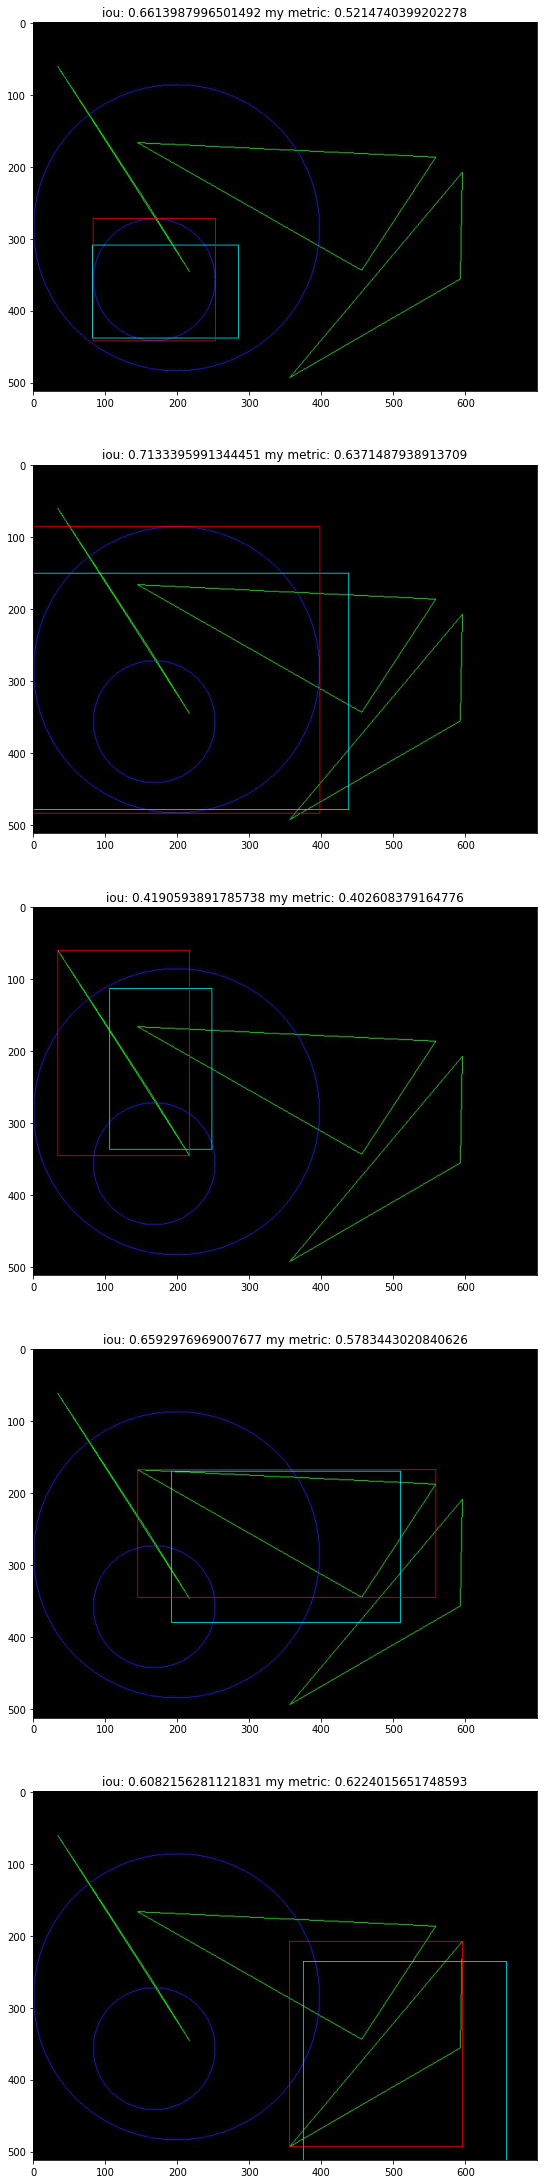

In [11]:
compare_iou_and_matric(file_gt,file_pred,img_path)